In [1]:
pip install tensorflow opencv-python matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Setup
dataset_dir = "E:\\ML Project\\face-mask-detector\\dataset"
  # Update if your dataset is elsewhere
img_size = 224
batch_size = 32

# Data generators
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

img_size = 224  # Define the image size

base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train with callbacks
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 31/188 ━━━━━━━━━━━━━━━━━━━━ 2:45 1s/step - accuracy: 0.5421 - loss: 0.8076

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.6226 - loss: 0.7102

188/188 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.6230 - loss: 0.7097 - val_accuracy: 0.8484 - val_loss: 0.4014
Epoch 2/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:50 591ms/step - accuracy: 0.8750 - loss: 0.4529

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.8750 - loss: 0.4529 - val_accuracy: 0.8504 - val_loss: 0.3996
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.8419 - loss: 0.3855

188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 758ms/step - accuracy: 0.8421 - loss: 0.3853 - val_accuracy: 0.9289 - val_loss: 0.2408
Epoch 4/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:45 565ms/step - accuracy: 1.0000 - loss: 0.1914

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 1.0000 - loss: 0.1914 - val_accuracy: 0.9295 - val_loss: 0.2399
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.9154 - loss: 0.2449

188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 758ms/step - accuracy: 0.9155 - loss: 0.2449 - val_accuracy: 0.9555 - val_loss: 0.1714
Epoch 6/10
  1/188 ━━━━━━━━━━━━━━━━━━━━ 2:13 714ms/step - accuracy: 0.9062 - loss: 0.2329

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.9062 - loss: 0.2329 - val_accuracy: 0.9561 - val_loss: 0.1706
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.9396 - loss: 0.1860

188/188 ━━━━━━━━━━━━━━━━━━━━ 147s 782ms/step - accuracy: 0.9397 - loss: 0.1859 - val_accuracy: 0.9641 - val_loss: 0.1351
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.9688 - loss: 0.1127 - val_accuracy: 0.9634 - val_loss: 0.1348
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9568 - loss: 0.1468

188/188 ━━━━━━━━━━━━━━━━━━━━ 179s 954ms/step - accuracy: 0.9568 - loss: 0.1468 - val_accuracy: 0.9701 - val_loss: 0.1129
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 49s 257ms/step - accuracy: 1.0000 - loss: 0.1056 - val_accuracy: 0.9701 - val_loss: 0.1128


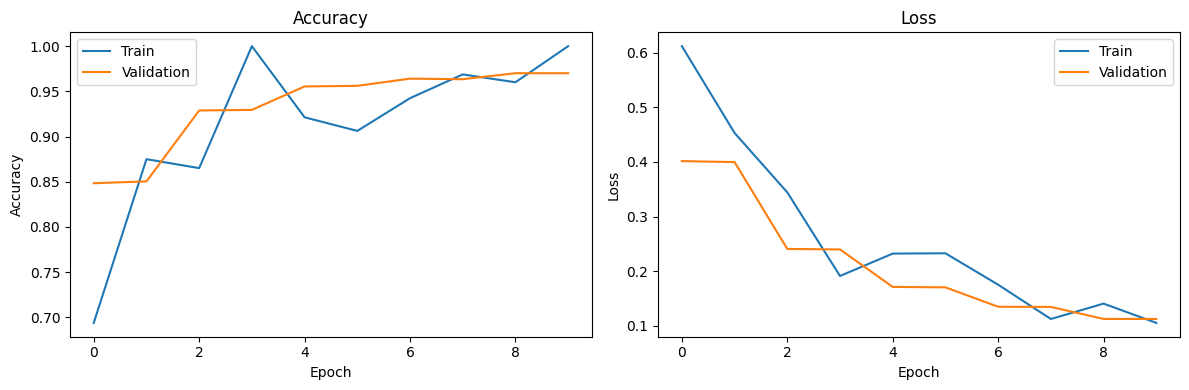

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = load_model('best_model.h5')  # or the correct path to your trained model

# Load OpenCV's face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)  # 0 is the default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = preprocess_input(np.expand_dims(face.astype("float32"), axis=0))

        pred = model.predict(face)[0][0]
        label = "Mask" if pred < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    cv2.imshow("Mask Detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = load_model('best_model.h5')

# Load OpenCV's face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Setup for live plot
plt.ion()
fig, ax = plt.subplots()
labels = ['Mask', 'No Mask']
counts = [0, 0]
bar = ax.bar(labels, counts, color=['green', 'red'])
ax.set_ylim(0, 10)  # Adjust if needed

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Reset counts each frame
    counts = [0, 0]

    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = preprocess_input(np.expand_dims(face.astype("float32"), axis=0))

        pred = model.predict(face)[0][0]
        label = "Mask" if pred < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # Count for plot
        if label == "Mask":
            counts[0] += 1
        else:
            counts[1] += 1

        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

    # Update bar chart
    for i, b in enumerate(bar):
        b.set_height(counts[i])
    ax.set_ylim(0, max(10, max(counts) + 1))
    plt.draw()
    plt.pause(0.001)

    # Show webcam frame
    cv2.imshow("Mask Detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()
